<a href="https://colab.research.google.com/github/mahmud666999/pythonProjects/blob/main/CR7_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
pip install numpy pandas matplotlib scikit-fuzzy


In [18]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
from google.colab import files

url='https://raw.githubusercontent.com/mahmud666999/pythonProjects/main/data_edited.csv'
df = pd.read_csv(url)
print(df)

     Minute
0        34
1        95
2        88
3        67
4        13
..      ...
705      61
706      18
707      23
708      44
709      78

[710 rows x 1 columns]


In [ ]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [15]:
df = pd.read_csv('/content/drive/MyDrive/437 Assignment-1/Assignment-2/data_edited.csv')
df.head()
print(df)

     Minute
0        34
1        95
2        88
3        67
4        13
..      ...
705      61
706      18
707      23
708      44
709      78

[710 rows x 1 columns]


In [21]:
# Specify the column name you want to retrieve
column_name = 'Minute'  # Replace with the actual column name

# Retrieve data from the specified column
column_data = df[column_name]

# Now 'column_data' contains all the values from the specified column
column_data_list = column_data.tolist()

from collections import Counter


# Use Counter to count occurrences of each unique number
counted_values = Counter(column_data_list)

# Convert the Counter object to a dictionary
counted_dict = dict(counted_values)

# Now 'counted_dict' contains the counts as key-value pairs
print(counted_dict)

{34: 9, 95: 2, 88: 9, 67: 8, 13: 10, 80: 8, 74: 6, 89: 15, 60: 6, 4: 4, 44: 9, 87: 8, 9: 5, 8: 5, 54: 7, 58: 9, 46: 7, 21: 5, 76: 14, 63: 4, 90: 17, 12: 9, 68: 10, 14: 9, 38: 10, 45: 15, 59: 10, 23: 15, 19: 6, 73: 7, 82: 12, 10: 10, 39: 8, 84: 8, 85: 3, 47: 6, 50: 9, 77: 5, 49: 11, 28: 6, 5: 3, 62: 10, 51: 8, 41: 6, 35: 10, 93: 3, 22: 8, 81: 12, 48: 6, 70: 14, 92: 5, 69: 9, 56: 4, 79: 8, 16: 4, 53: 8, 3: 8, 24: 7, 32: 8, 26: 12, 25: 11, 30: 8, 43: 8, 65: 10, 11: 6, 6: 7, 57: 9, 61: 9, 17: 5, 27: 7, 1: 1, 75: 4, 2: 6, 64: 11, 71: 6, 18: 7, 78: 11, 29: 5, 36: 5, 15: 4, 55: 8, 86: 7, 91: 7, 72: 2, 20: 6, 42: 4, 103: 1, 52: 9, 94: 2, 37: 5, 66: 3, 96: 2, 31: 5, 40: 4, 120: 1, 83: 5, 7: 2, 33: 3, 97: 2, 104: 1, 105: 1, 109: 1}


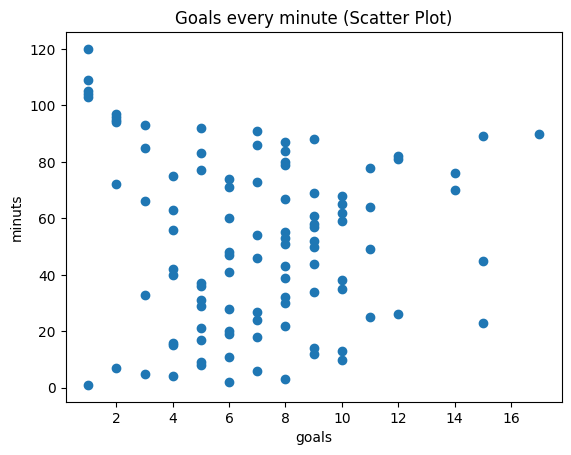

In [22]:
numbers = list(counted_dict.keys())
counts = list(counted_dict.values())

# Create a scatter plot
plt.scatter(counts, numbers, marker='o')
plt.xlabel('goals')
plt.ylabel('minuts')
plt.title('Goals every minute (Scatter Plot)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



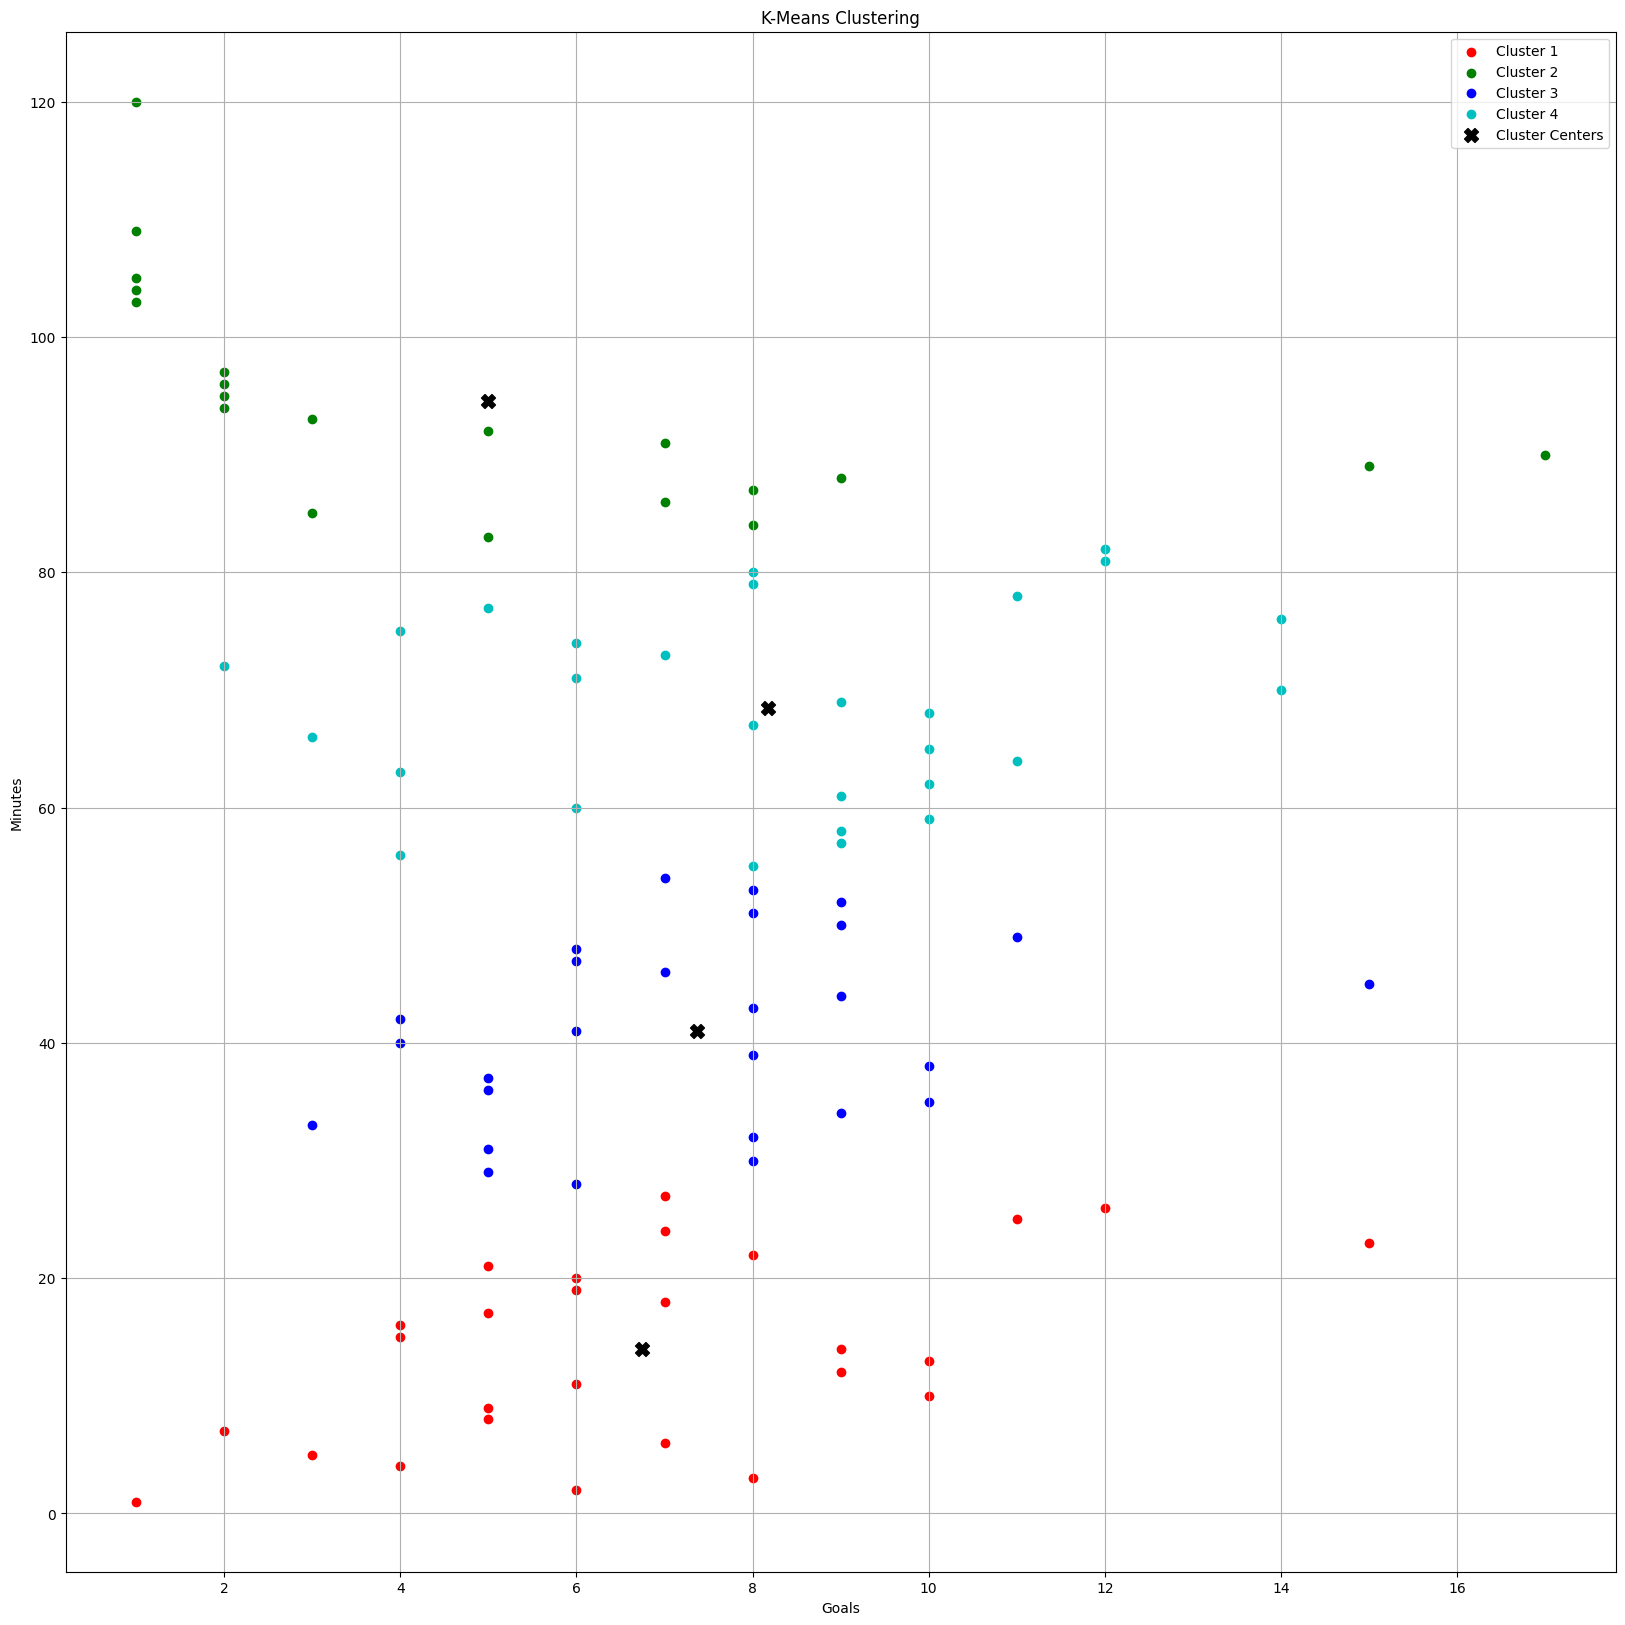

In [24]:

from sklearn.cluster import KMeans

# Combine the two lists
data = np.array(list(zip(counts, numbers)))

# Choose number of clusters (K)
n_clusters = 4

# Initialize k-means instance
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to the data
kmeans.fit(data)

# Cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(20, 20))

# Create a list of colors for each cluster
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Iterate through each cluster and plot its data points
for i in range(n_clusters):
    cluster_data = data[cluster_assignments == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label=f'Cluster {i + 1}')

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=100, label='Cluster Centers')

plt.xlabel('Goals')
plt.ylabel('Minutes')
plt.title('K-Means Clustering')
plt.legend()
plt.grid()
plt.show()